# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Dan Larremore

***

This assignment is due on Moodle by **5pm on Friday February 2nd**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

An owner of an animal sanctuary wants to estimate her sanctuary's average food consumption over the next year in order to estimate the future food costs. Her sanctuary comprises 75 pandas, 25 otters, 50 buffalo, and 50 owls. The owner pops open her SanctuaryTrackr App's Current Resident List, randomly selects 24 animals from it, and tracks their food consumptions in pounds per day (lbs/day) over the next week. So as to get a good estimate, she intentionally selects 9 pandas, 3 otters, 6 buffalo, and 6 owls. 

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

Solution:

- the population: All the animals in the sanctuary. 
- the sample frame: SanctuaryTrackr App's Current Resident List
- the sample: The 9 pandas, 3 otters, 6 buffalo, and 6 owls. 
- the type of sample: Stratified 
- the quantity of interest: Daily food consumption in lbs/day 

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
3.2 \quad
4.2 \quad
3.0 \quad
6.6
$$

**Part A**: Compute the sample mean and sample median.


In [2]:
x = np.array([4.6,5.0,6.5,3.2,4.2,3.0,6.6,7.7])
print("The Mean is {:.3f}".format(x.mean()))
x.sort()
print("The Median is {:.3f}".format((x[3]+x[4])/2))

The Mean is 5.100
The Median is 4.800


Solution:

The mean is 5.1 and the median is 4.8.

**Part B**: We replace the element $5.0$ by some real number $q$. What happens with the sample mean and the sample median of this new dataset as $q \rightarrow -\infty$?

Solution:

The median becomes (4.6+4.2)/2 = 4.4.  The mean diverges to $-\infty$.

**Part C**: We replace a number of elements by some real number $q$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $q \rightarrow -\infty$?

Solution:

We need to replace 4 elements, since the median is computed using the 4th and 5th elements of the dataset. 

**Part D**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $q$, so that the sample mean of the new dataset diverges as $q \rightarrow -\infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to negative infinity? 

Solution:

Replace just one element for the sample mean to diverge. Replace n/2 elements if n is even and (n+1)/2 elements if n is odd, for the median to diverge.

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

***
**Solution**: We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}
***

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [3]:
def my_sample_mean(xx):
    n = len(xx)
    total = np.sum(xx)
    return total/n

def my_sample_var(xx):
    mean = my_sample_mean(xx)
    centered = xx - mean
    squared = centered**2
    return np.sum(squared)/(len(xx)-1)

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array.

`otter_weights = [25, 29, 40, 19, 7, 6, 3, 12, 19, 21, 22, 45, 27]`

In [4]:
otter_weights = [25, 29, 40, 19, 7, 6, 3, 12, 19, 21, 22, 45, 27]
print(my_sample_mean(otter_weights),my_sample_var(otter_weights))

21.153846153846153 157.30769230769232


Solution:

- Otter weights mean: 21.15
- Otter weights variance: 157.31

**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first one otter, the first two otters, the first three otters, and so on up to all the otters. Store your otter means in a numpy array called `otterations`.

In [5]:
def update_mean(prev_mean,xn,n):
    return prev_mean + (xn-prev_mean)/n

otterations = []
for idx,w in enumerate(otter_weights):
    if idx==0:
        otterations.append(w)
    else:
        otterations.append(update_mean(otterations[idx-1],w,idx+1))

otterations = np.array(otterations)

In [6]:
for idx,otter in enumerate(otterations):
    print("The first {:.0f} otters have average weight {:.3f}".format(idx+1,otter))

The first 1 otters have average weight 25.000
The first 2 otters have average weight 27.000
The first 3 otters have average weight 31.333
The first 4 otters have average weight 28.250
The first 5 otters have average weight 24.000
The first 6 otters have average weight 21.000
The first 7 otters have average weight 18.429
The first 8 otters have average weight 17.625
The first 9 otters have average weight 17.778
The first 10 otters have average weight 18.100
The first 11 otters have average weight 18.455
The first 12 otters have average weight 20.667
The first 13 otters have average weight 21.154


### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [7]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

Solution:  If there were class warfare, we would expect that the first class is asserting its privilege over the lower classes, so first class passengers should be more likely to survive.  If there were chivalry, it would be the case that men have lower survival rates than women.  These are not mutually exclusive

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [8]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part C**: Determine the fraction of survivors from each passenger class. 

In [10]:
for pc in [1,2,3]:
    survived = dfTitanic.loc[dfTitanic["Pclass"]==pc, "Survived"].sum()
    total = len(dfTitanic.loc[dfTitanic["Pclass"]==pc])
    print("Class {} Survival Fraction: {:.3f}".format(pc, survived/total))

Class 1 Survival Fraction: 0.643
Class 2 Survival Fraction: 0.483
Class 3 Survival Fraction: 0.252


***
**Solution**: The fraction of survivors by class are as follows 

\begin{array}{c|c}
\textrm{Class} & \textrm{Survival Rate} \\
\hline
1 & 0.643 \\
2 & 0.483 \\
3 & 0.252
\end{array}

We definitely see a correlation between Survival Rate and being a member of the upper class 

***

**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [11]:
for pc in [1,2,3]:
    for sex in ["male", "female"]:
        survived = dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"].sum()
        total = len(dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"])
        print(pc, sex, survived, total)
        print("Class {} {:>6} Survival Fraction: {:.3f}".format(pc, sex, survived/total))

1 male 36 93
Class 1   male Survival Fraction: 0.387
1 female 72 75
Class 1 female Survival Fraction: 0.960
2 male 16 87
Class 2   male Survival Fraction: 0.184
2 female 54 58
Class 2 female Survival Fraction: 0.931
3 male 39 283
Class 3   male Survival Fraction: 0.138
3 female 62 118
Class 3 female Survival Fraction: 0.525


***
**Solution**: The fraction of survivors by class and sex are as follows 

\begin{array}{c|c|c}
\textrm{Class} & \textrm{Sex} & \textrm{Survival Rate} \\
\hline
1 & \textrm{male}   &  0.387 \\
1 & \textrm{female} &  0.960 \\ 
2 & \textrm{male}   &  0.184 \\
2 & \textrm{female} &  0.931 \\ 
3 & \textrm{male}   &  0.138 \\
3 & \textrm{female} &  0.525 \\ 
\end{array}

Women in 3rd class survived at a slightly higher rate than men in 1st class. 

***

**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

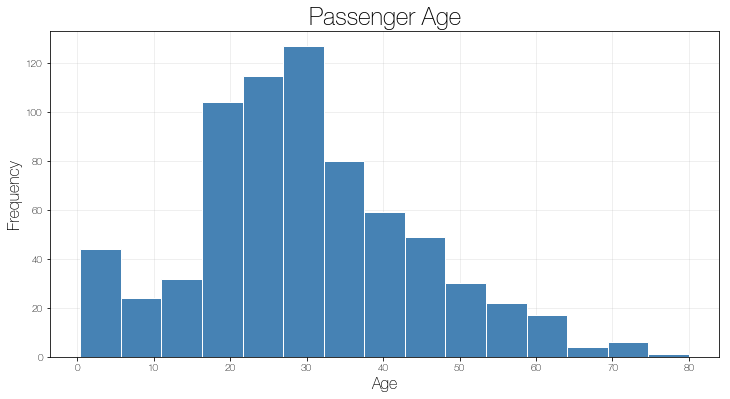

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
dfTitanic.hist(column="Age", ax=ax, facecolor="steelblue", edgecolor="white",bins=15)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Passenger Age", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

The distribution is **unimodal** and has a rightward or **positive skew**.

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [15]:
mean_survived = dfTitanic.loc[dfTitanic["Survived"]==1, "Age"].mean()
mean_died = dfTitanic.loc[dfTitanic["Survived"]==0, "Age"].mean()
median_survived = dfTitanic.loc[dfTitanic["Survived"]==1, "Age"].median()
median_died = dfTitanic.loc[dfTitanic["Survived"]==0, "Age"].median()

print("Mean Age:  Survived = {:.3f} vs. Died = {:.3f}".format(mean_survived, mean_died))
print("Median Age: Survived = {:.3f} vs. Died = {:.3f}".format(median_survived, median_died))

Mean Age:  Survived = 29.619 vs. Died = 29.750
Median Age: Survived = 27.000 vs. Died = 29.000


The means are practically identical. The median age of female survivors was 2 years younger than the median age of those women who didn't survive. 

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

Women tended to survive more than men, so it appears that the men were being chivalrous and making sure that the women got off the boat first. On the other hand, the first class folks were far more likely to survive. It looks, therefore, like a mix of both. 

### Problem 5 - Not anotter homework problem! :(
***

Otters are undisputedly one of nature's most awesome animals. From a cursory Google Image Search of *baby otter* or *otters holding hands* or *otters water slide* this is easy to demonstrate.

Because the CS Department was able to pull a few strings, we have obtained a dataset of sea otter behavior. For each otter studied, the dataset contains:

- **hhrecord**: the otter's personal record for hand-holding (hours; 999) 
- **pawsize**: the size of the otter's paw (unspecified units; 999)
- **floatation**: boolean, indicating whether the otter displayed leadership in floatation. (9)
- **satscore**: the otter's projected SAT score percentile. (unclear why this was included; 99)
- **height**: otter's height (unspecified units; 99)
- **weight**: otter's weight (unspecified units; 999)
- **urchins**: boolean, indicating whether the otter was observed eating urchins (9)

All these data are included in the whitespace-delimited file `otters.data`

In [16]:
df = pd.read_csv("otters.data", delim_whitespace=True)
df.head()

,hhrecord,pawsize,floatation,satscore,height,weight,urchins
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values. Those values are listed parenthetically in the description above Store the modified data set in a Pandas DataFrame called dfOtters. 

In [17]:
dfOtters = df.copy()
dfOtters.loc[dfOtters["hhrecord"]==999, "hhrecord"] = np.nan
dfOtters.loc[dfOtters["pawsize"]==999, "pawsize"] = np.nan
dfOtters.loc[dfOtters["floatation"]==9, "floatation"] = np.nan
dfOtters.loc[dfOtters["height"]==99, "height"] = np.nan
dfOtters.loc[dfOtters["weight"]==999, "weight"] = np.nan
dfOtters.loc[dfOtters["urchins"]==9, "urchins"] = np.nan
dfOtters = dfOtters.dropna()
dfOtters.head()

,hhrecord,pawsize,floatation,satscore,height,weight,urchins
0,120.0,284.0,0.0,27,62.0,100.0,0.0
1,113.0,282.0,0.0,33,64.0,135.0,0.0
2,128.0,279.0,0.0,28,64.0,115.0,1.0
4,108.0,282.0,0.0,23,67.0,125.0,1.0
5,136.0,286.0,0.0,25,62.0,93.0,0.0


**Part B**: Use the information in dfOtters to create a density histogram of the hand-holding records of otters who do not eat sea urchins (urchins=0) and another histogram placed directly below the first in the same graphics device for the hand-holding records of otters who do eat urchins (urchins=1).  Make the range of the horizontal axis $30$ to $180$ (hours) for both histograms.  Make sure to give each subplot titles and label axes. 

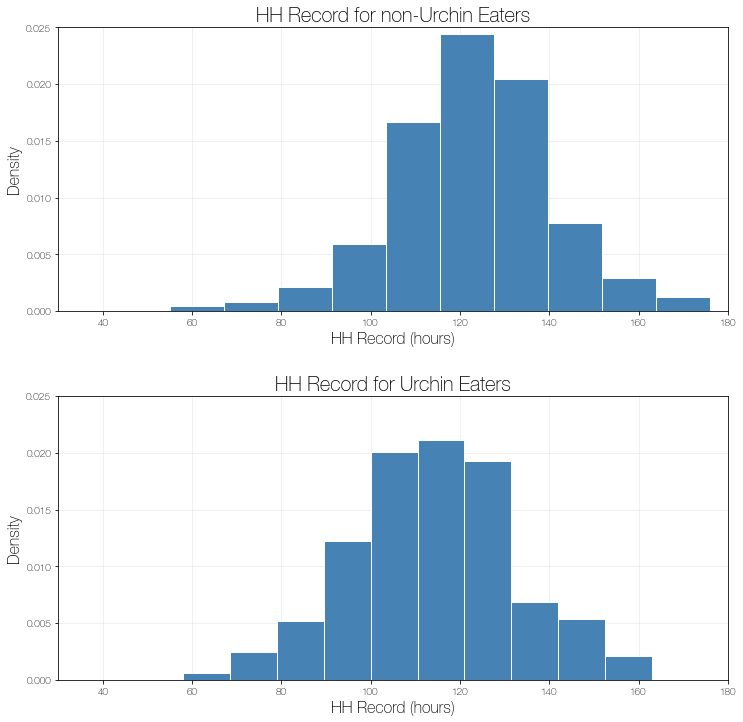

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
dfNoUrchin = dfOtters.loc[dfOtters["urchins"]==0]
dfNoUrchin.hist(column="hhrecord", ax=axes[0], normed=True, facecolor="steelblue", edgecolor="white")
axes[0].set_xlabel("HH Record (hours)", fontsize=16)
axes[0].set_ylabel("Density", fontsize=16)
axes[0].set_title("HH Record for non-Urchin Eaters", fontsize=20)
axes[0].set_xlim([30,180])
axes[0].set_ylim([0,0.025])
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

dfUrchin = dfOtters.loc[dfOtters["urchins"]==1]
dfUrchin.hist(column="hhrecord", ax=axes[1], normed=True, facecolor="steelblue", edgecolor="white")
axes[1].set_xlabel("HH Record (hours)", fontsize=16)
axes[1].set_ylabel("Density", fontsize=16)
axes[1].set_title("HH Record for Urchin Eaters", fontsize=20)
axes[1].set_xlim([30,180])
axes[1].set_ylim([0,0.025]);
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

**Part C**: Based on the histograms in **Part B**, characterize the distribution of hand-holding records for both urchin and non-urchin eaters.

Solution: both distributions are unimodal, and perhaps slightly negatively skewed. The typical Urchin eater holds hands for a shorter amount of time than the typical non-Urchin eater. 

**Part D**: What are the mean and median hand-holding record differences between otters who eat urchins and otters who don't?  Can you think of any reason not to use the mean as a measure of center to compare records for this problem? 

In [19]:
mean_diff = dfOtters.loc[dfOtters["urchins"]==0, "hhrecord"].mean() - dfOtters.loc[dfOtters["urchins"]==1, "hhrecord"].mean()
median_diff = dfOtters.loc[dfOtters["urchins"]==0, "hhrecord"].median() - dfOtters.loc[dfOtters["urchins"]==1, "hhrecord"].median()
print("Mean Record Difference = Mean(urchins==0)-Mean(urchins==1) = {:.3f} hrs".format(mean_diff))
print("Median Record Difference = Med(urchins==0)-Med(urchins==1) = {:.3f} hrs".format(median_diff))

Mean Record Difference = Mean(urchins==0)-Mean(urchins==1) = 9.261 hrs
Median Record Difference = Med(urchins==0)-Med(urchins==1) = 8.000 hrs


**Part E**: Create side-by-side box-and-whisker plots to compare the hand-holding records of otters who eat urchins and otters who do not.  Use the box-and-whisker plot conventions discussed in lecture. 

Text(0,0.5,'handholding record')

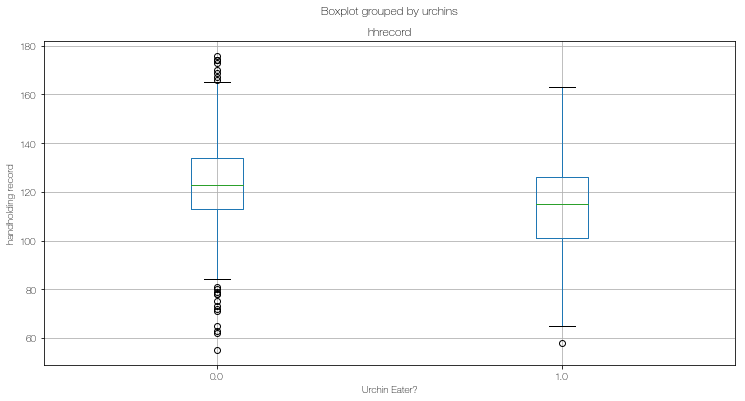

In [20]:
ax = dfOtters.boxplot(column="hhrecord",by=["urchins"],figsize=(12,6))
plt.xlabel('Urchin Eater?')
plt.ylabel('handholding record')

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of hand-holding records of otters within each urchin / non-urchin groups as well as the comparison of the two classes. 

- Non-urchin eaters have a higher median than urchin eaters

- Non-urchin eaters have more outliers

- IQRs are comparable, although urchin eaters have a slightly larger IQR than non-eaters.

### Problem 6: Cleaning Election Results Data  
***

The file 2014\_election\_results.csv contains data from congressional district races during the 2014 midterm elections.  The problem is that the data is **extremely dirty**.  Your goal in the problem will be to use Pandas to clean the election result data and then, if possible, determine the names of the winners in each congressional district as well as the vote percentage margin that they won by.  Remember that data cleaning and wrangling is a messy business.  Don't be afraid to roll your sleeves up and get hacky!   

**Part A**: Complete the clean_election_data( ) function to return a clean DataFrame that accomplishes the following: 

- remove rows in the DataFrame that are missing values in columns **STATE**, **D**, and/or **GENERAL PERCENT**

<p> </p> 

- replace unknown names in **CANDIDATE NAME** with:  
    - the value from **CANDIDATE NAME (Last)**, if available
    - the string "UNKNOWN" if impossible to determine the full or last name 
    - **Note**: besides "NaN", data collectors appear to have used the string "Scattered" to indicate missing names as well
<p> </p> 
- convert the strings in **GENERAL PERCENT** to values of type float between $0$ and $100$ 
<p> </p> 
- restrict the DataFrame to only the columns **STATE**, **D**, **CANDIDATE NAME**, **GENERAL PERCENT**

In [21]:
# ----------------------------
# A solution 
# ----------------------------
def clean_district_margins():
    '''
    Function to clean election data 
    '''
    
    # read in dirty data 
    df = pd.read_csv("2014_election_results.csv")
    
    # drop rows that have no state, district, or vote percentage 
    df = df.dropna(subset=["STATE", "D", "GENERAL PERCENT"])
    
    # replace missing names in CANDIDATE NAME 
    df.loc[:, "CANDIDATE NAME"] = df.loc[:, "CANDIDATE NAME"].fillna("UNKNOWN") 
    df.loc[df["CANDIDATE NAME"].str.contains("Scattered"), "CANDIDATE NAME"] = "UNKNOWN"
    
    # replace missing names in CANDIDATE NAME (Last)
    df.loc[:, "CANDIDATE NAME (Last)"] = df.loc[:, "CANDIDATE NAME (Last)"].fillna("UNKNOWN") 
    df.loc[df["CANDIDATE NAME (Last)"].str.contains("Scattered"), "CANDIDATE NAME (Last)"] = "UNKNOWN"
    
    # Set missing names from Last Name column if available 
    df.loc[:,"CANDIDATE NAME"] = df.apply(lambda row: row["CANDIDATE NAME (Last)"] if row["CANDIDATE NAME"] == "UNKNOWN" 
                                          else row["CANDIDATE NAME"], axis=1)
    
    # get rid of columns we don't care about 
    df = df.loc[:,["STATE", "D", "CANDIDATE NAME", "GENERAL PERCENT"]]
    
    # Convert vote percentage strings into numerical values for later sorting
    df.loc[:,'GENERAL PERCENT'] = df.loc[:,'GENERAL PERCENT'].apply(
        lambda gstr: float(gstr.replace(",",".").replace("%","")))
    
    return df

In [23]:
dfClean = clean_district_margins()
dfClean.head()

,STATE,D,CANDIDATE NAME,GENERAL PERCENT
0,Alabama,1,"Byrne, Bradley",68.16
1,Alabama,1,"LeFlore, Burton R.",31.71
2,Alabama,1,UNKNOWN,0.13
5,Alabama,2,"Roby, Martha",67.34
6,Alabama,2,Wright,32.56


In [24]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1369 entries, 0 to 3706
Data columns (total 4 columns):
STATE              1369 non-null object
D                  1369 non-null object
CANDIDATE NAME     1369 non-null object
GENERAL PERCENT    1369 non-null float64
dtypes: float64(1), object(3)
memory usage: 53.5+ KB


**Part B**: Complete the function winners_and_margins( ) that takes in your clean DataFrame from **Part A** and returns a DataFrame with one row per state-district pair and with columns **STATE**, **D**, **WINNER**, and **MARGIN** where

- **STATE** and **D** are as defined in the original DataFrame 
<p> </p> 
- **WINNER** is the name of the candidate that had the largest general vote percentage (which may possibly be "UNKNOWN")
<p> </p> 
- **MARGIN** is the difference between the winning general vote percentage and the second highest vote percentage.  If there is only one candidate in a particular district you should list the general vote percentage obtained by the sole candidate. 

<p> </p> 

Finally, your DataFrame should be **sorted from most contentious races to least contentious** (i.e. from smallest winning margin to the largest). 

In [25]:
# ----------------------------
# A solution 
# ----------------------------

def get_margin(x):
    return np.sort(x)[-1] - np.sort(x)[-2] if len(x) > 1 else np.max(x)

def winners_and_margins(df):
    
    # Get DataFrame with winning margins in each state-district combo 
    dfM = df.groupby(["STATE", "D"], as_index=False)["GENERAL PERCENT"].agg({"MARGIN" : get_margin})
    
    # Slice out names of winners 
    mask = df.groupby(["STATE", "D"], as_index=False)["GENERAL PERCENT"].agg('idxmax')
    dfW  = df.loc[mask, ["STATE", "D", "CANDIDATE NAME"]]
    dfW.rename(columns={"CANDIDATE NAME" : "WINNER"}, inplace=True)
    
    # Merge the DataFrames 
    dfWinnersMargins = pd.merge(dfM, dfW)
    
    # Sort by margin 
    dfWinnersMargins.sort_values(by="MARGIN",inplace=True)
    
    return dfWinnersMargins

In [26]:
dfWinners = winners_and_margins(dfClean)
dfWinners

,STATE,D,MARGIN,WINNER
10,Arizona,2,0.07,McSally
343,Pennsylvania,H,0.17,UNKNOWN
72,California,7,0.80,"Bera, Ami"
98,Florida,2,1.13,"Graham, Gwen"
218,Minnesota,8,1.40,"Nolan, Rick"
185,Maryland,6,1.45,"Delaney, John K."
29,California,16,1.46,Costa
421,Washington,4,1.62,"Newhouse, Dan"
378,Texas,23,2.10,"Hurd, Will"
158,Iowa,1,2.28,"Blum, Rod"
